In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, shapiro, anderson
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

In [ ]:
regresion_economica = pd.read_csv("/content/Reto3_Regresion_Economica.csv")
regresion_economica.describe()

,Desempleo,Educación,Ingreso,Población,Criminalidad
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9.074793,71.990294,49457.932857,5170.581667,55.657441
std,3.582284,11.995031,11793.016479,1404.184269,24.329416
min,3.190294,50.016370,21991.174612,1010.121483,-7.157420
25%,5.602564,63.934841,41803.845829,4355.591649,38.285927
50%,9.077954,71.825567,49346.714311,5427.366736,55.403138
75%,11.997881,81.541491,56296.475437,6180.015430,74.956475
max,14.889872,94.393488,83545.613558,8758.263876,120.095150


In [ ]:
regresion_economica

,Desempleo,Educación,Ingreso,Población,Criminalidad
0,13.018106,54.451069,45252.239405,6108.797473,85.946474
1,4.257553,65.514902,41958.538589,2472.554408,12.709064
2,11.935686,81.016431,53837.426713,4526.215830,56.809065
3,7.326010,58.197291,46453.033757,3802.897147,42.444628
4,7.311730,50.114356,54888.441199,5424.118841,40.839398
...,...,...,...,...,...
95,9.613554,68.336021,49213.053829,4761.054100,52.666421
96,3.690663,75.858527,51232.873245,4689.810320,26.628547
97,10.143682,78.754311,41339.767549,5966.707820,74.877998
98,10.716530,56.423991,33699.329578,4618.931160,73.974893


# Análisis exploratorio

In [ ]:
Desempleo = regresion_economica['Desempleo'].values
Educacion = regresion_economica['Educación'].values
Ingreso = regresion_economica['Ingreso'].values
Poblacion = regresion_economica['Población'].values
Criminalidad = regresion_economica['Criminalidad'].values

In [ ]:
condiciones = [Desempleo,Educacion,Ingreso,Poblacion,Criminalidad]
condiciones1 = [Desempleo,Educacion,Ingreso,]
condiciones2 = [Poblacion,Criminalidad]

###1 ) Carga los datos y realiza un análisis exploratorio inicial. Incluye estadísticas descriptivas básicas y visualizaciones como histogramas y diagramas de dispersión para cada variable.


####Histogramas para cada variable

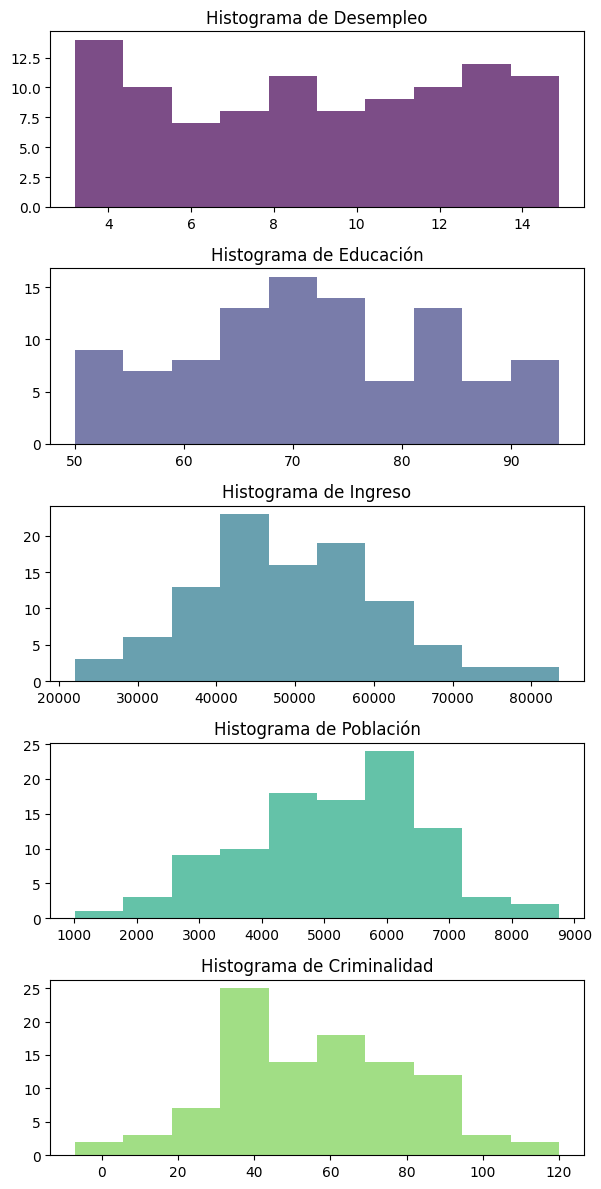

In [ ]:
# Crear una figura y ejes para los histogramas
fig, axs = plt.subplots(len(condiciones), figsize=(6, 12))

# Iterar sobre las variables en la lista condiciones y crear un histograma para cada una
for i, condicion in enumerate(condiciones):
  axs[i].hist(condicion, bins=10, color=plt.cm.viridis(i / len(condiciones)), alpha=0.7)
  axs[i].set_title('Histograma de {}'.format(regresion_economica.columns[i]))

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la imagen con los histogramas
plt.show()

####Diagramas de Dispersión

###2) Examina las relaciones entre la variable dependiente y cada variable explicativa utilizando gráficos de dispersión.


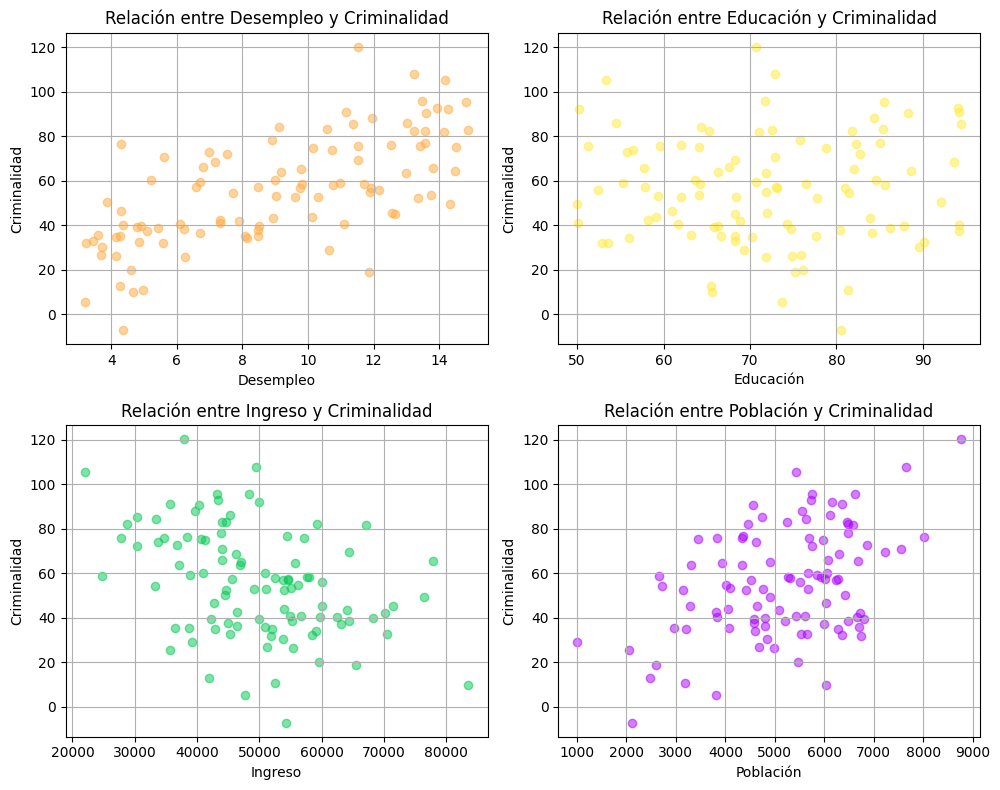

In [ ]:
# Variables predictoras
variables_predictoras = ['Desempleo', 'Educación', 'Ingreso', 'Población']
# Definir una paleta de colores
colores = ['#ffab40', '#ffeb3b', '#00c853', '#aa00ff']
# Variable objetivo
variable_objetivo = 'Criminalidad'
# Crear una figura con subtramas
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# Crear gráficos de dispersión para cada variable predictora
for i, (variable,color) in enumerate(zip(variables_predictoras,colores)):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(regresion_economica[variable], regresion_economica[variable_objetivo], alpha=0.5, color=color)
    axs[row, col].set_title(f'Relación entre {variable} y {variable_objetivo}')
    axs[row, col].set_xlabel(variable)
    axs[row, col].set_ylabel(variable_objetivo)
    axs[row, col].grid(True)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### 3) Verifica la multicolinealidad preliminar usando la matriz de correlación entre las variables explicativas. Usa correlaciones de Pearson y Spearman, identifica similitudes y diferencias tanto de los supuestos como de los resultados.


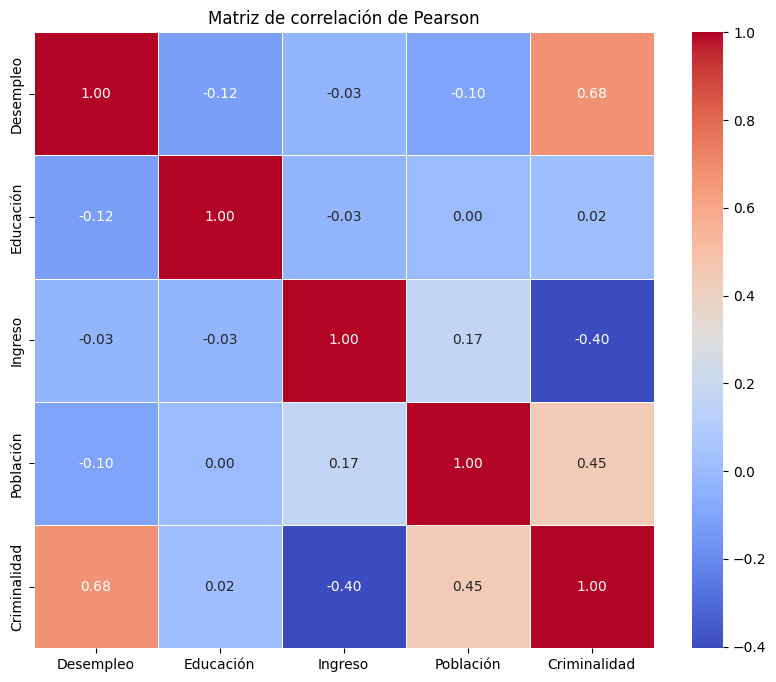

In [ ]:
# Calcula la matriz de correlación
correlaciones = regresion_economica.corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación de Pearson')
plt.show()


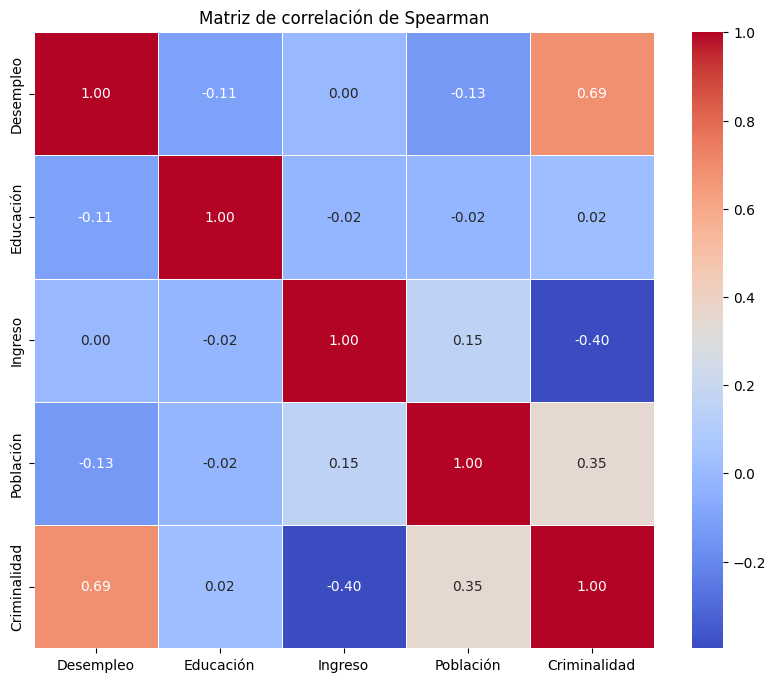

In [ ]:
# Calcula la matriz de correlación
correlaciones = regresion_economica.corr(method = 'spearman')

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación de Spearman')
plt.show()


####Multicolinealidad

In [ ]:
variables_independientes = regresion_economica.drop(columns=['Criminalidad'])

# Añade una columna constante para el término de intersección (intercept) en el modelo
variables_independientes_with_const = add_constant(variables_independientes)

# Calcula el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = variables_independientes_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(variables_independientes_with_const.values, i) for i in range(variables_independientes_with_const.shape[1])]

# Muestra los resultados
print(vif_data)


    Variable        VIF
0      const  79.485553
1  Desempleo   1.025018
2  Educación   1.015248
3    Ingreso   1.029761
4  Población   1.038540


# Modelo inicial

In [ ]:
X = regresion_economica[['Desempleo', 'Educación', 'Ingreso'	, 'Población' ]]  # Variables independientes
y = regresion_economica['Criminalidad']  # Variable dependiente

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

#Predicciones
y_pred = modelo.predict(X)

#Residuales
residuos = modelo.resid
print("Residuos:", residuos)

                            OLS Regression Results                            
Dep. Variable:           Criminalidad   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     541.2
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.95e-64
Time:                        04:39:23   Log-Likelihood:                -302.10
No. Observations:                 100   AIC:                             614.2
Df Residuals:                      95   BIC:                             627.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6867      4.540     -1.693      0.0

# Verificación de supuestos

### Normalidad

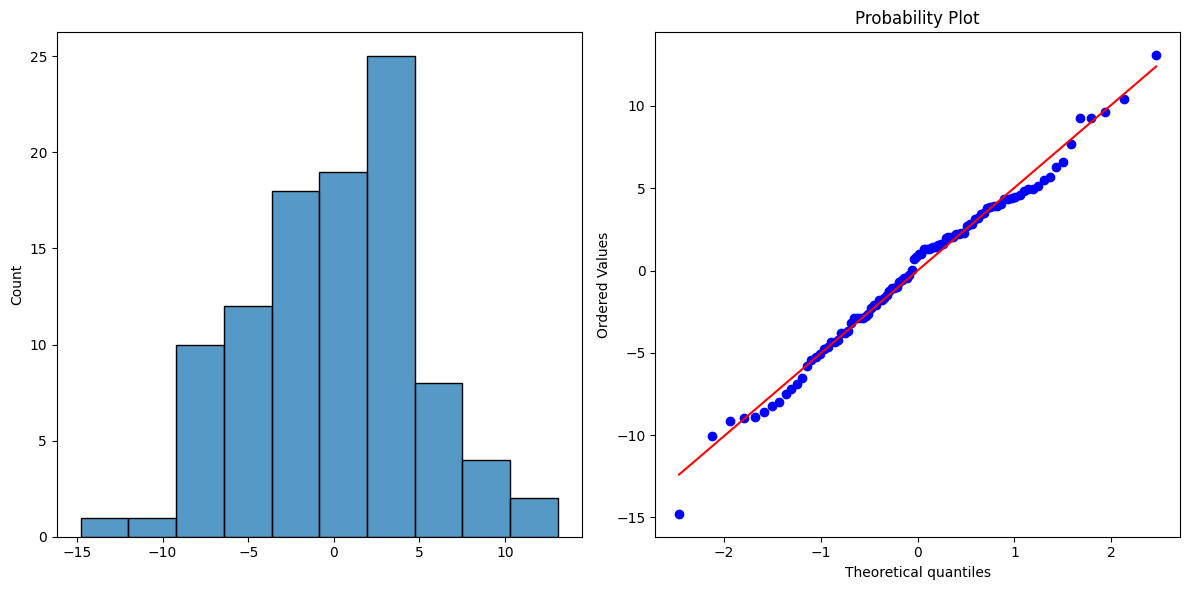

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.histplot(residuos, kde=False, bins=10)


    # QQ-Plot
plt.subplot(122)
stats.probplot(residuos, plot=plt)

plt.tight_layout()
plt.show()

###Pruebas de normalidad

Prueba de Shapiro-Wilk

In [ ]:
stat, p_valor = shapiro(residuos)

# Imprimir el resultado
print("Estadística de prueba:", stat)
print("Valor p:", p_valor)

# Interpretación del resultado
alpha = 0.05
if p_valor > alpha:
    print("No se puede rechazar la hipótesis nula: los datos parecen ser normales")
else:
    print("Se rechaza la hipótesis nula: los datos no parecen ser normales")

Estadística de prueba: 0.9902538657188416
Valor p: 0.6851223111152649
No se puede rechazar la hipótesis nula: los datos parecen ser normales


Prueba de Anderson-Darling

In [ ]:
resultado = anderson(residuos)

# Imprimir el resultado
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia correspondientes:", resultado.significance_level)

# Interpretación del resultado
for i, nivel in enumerate(resultado.significance_level):
    if resultado.statistic < resultado.critical_values[i]:
        print("No se puede rechazar la hipótesis nula de normalidad para el nivel de significancia los datos se ajustan bien a una distribución normal", nivel)
    else:
        print("Se rechaza la hipótesis nula de normalidad para el nivel de significancia", nivel)

Estadística de prueba: 0.4113467530136319
Valores críticos: [0.555 0.632 0.759 0.885 1.053]
Niveles de significancia correspondientes: [15.  10.   5.   2.5  1. ]
No se puede rechazar la hipótesis nula de normalidad para el nivel de significancia los datos se ajustan bien a una distribución normal 15.0
No se puede rechazar la hipótesis nula de normalidad para el nivel de significancia los datos se ajustan bien a una distribución normal 10.0
No se puede rechazar la hipótesis nula de normalidad para el nivel de significancia los datos se ajustan bien a una distribución normal 5.0
No se puede rechazar la hipótesis nula de normalidad para el nivel de significancia los datos se ajustan bien a una distribución normal 2.5
No se puede rechazar la hipótesis nula de normalidad para el nivel de significancia los datos se ajustan bien a una distribución normal 1.0


### Evalúa la homocedasticidad de los residuos de dos maneras:

(a) Gráfico de Dispersión: Evalúa la homocedasticidad de los residuos con gráficos de dispersión de los residuos contra los valores predichos.

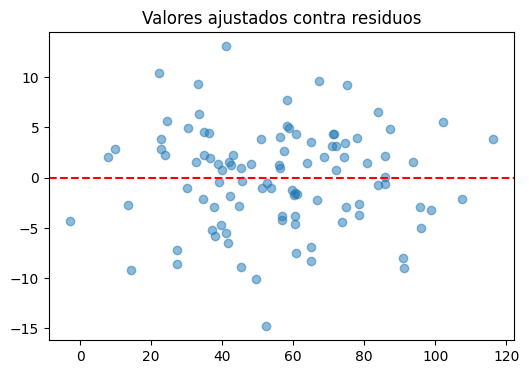

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuos, alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Valores ajustados contra residuos')
plt.show()

Test de Breusch-Pagan: Implementa el test de Breusch-Pagan para evaluar formalmente la homocedasticidad.

In [ ]:
lm, lm_pvalue, _, _ = het_breuschpagan(residuos, X)

In [ ]:
print('Estadístico del Multiplicador de Lagrange:', lm)
print('p-valor del estadístico del Multiplicador de Lagrange:', lm_pvalue)

Estadístico del Multiplicador de Lagrange: 5.2020500108712175
p-valor del estadístico del Multiplicador de Lagrange: 0.2671870038555879


No se rechaza $H_0$: los residuos cumplen homocedasticidad

### Independencia de residuos

#### Prueba de Durbin-Watson

Prueba estadística que se utiliza para detectar la presencia de autocorrelación (una relación entre los valores separados el uno del otro por un intervalo de tiempo dado) en los residuos (errores de predicción) de un análisis de regresión

SUPUESTOS


*  Que los errores se distribuyen normalmente con una media de 0.
*   Los errores son estacionarios: las propiedades estadísticas de los errores (como la media y la varianza) no cambian con el tiempo


In [ ]:
residuos.mean()

-4.031015521377413e-12

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Realiza la prueba de Dickey-Fuller aumentada
resultado = adfuller(residuos)

print(f"Estadístico de prueba: {resultado[0]}")
print(f"P-valor: {resultado[1]}")
if resultado[1] < 0.05:
    print('rechazar la hipótesis nula:hay evidencia suficiente para sugerir que la serie es estacionaria')

Estadístico de prueba: -10.466198381539806
P-valor: 1.3197908296998044e-18
rechazar la hipótesis nula:hay evidencia suficiente para sugerir que la serie es estacionaria


H0 (hipótesis nula): No existe correlación entre los residuos.

HA (hipótesis alternativa): Los residuos están autocorrelacionados.



*   si d es menor que 1,5 o mayor que 2,5, existe un problema de potencialmente grave.  
*  si d está entre 1,5 y 2,5, es probable que la autocorrelación no sea motivo de preocupación



In [ ]:
d = durbin_watson(residuos)

print(f"Estadístico Durbin-Watson: {d}")

Estadístico Durbin-Watson: 2.120728754997438
